In [165]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [166]:
###1### ###
df = pd.read_csv('dados_produtos.csv')

Text(0.5, 0, 'Product Name')

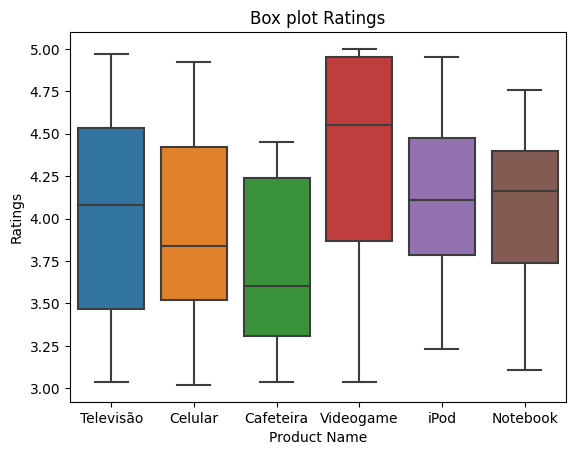

In [167]:
###2###
sns.boxplot(y=df['rating'], x=df['product_name'])
plt.title('Box plot Ratings')
plt.ylabel('Ratings')
plt.xlabel('Product Name')

In [168]:
###2###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [169]:
###2###
df.describe()

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


In [170]:
###3###
#testando se existem valores invalidos

df['rating'].isnull().sum()
df['rating_count'].isnull().sum()
df['purchased'].isnull().sum()
df['product_name'].isnull().sum()

0

In [171]:
df.head(10)

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1
5,Celular,3.98,1413,0
6,iPod,3.50,1907,0
7,Notebook,4.76,3857,0
8,Videogame,3.94,2800,1
9,Televisão,4.68,2600,0


In [172]:
#Dados treinamento (arvore decisão)
x = df[['rating', 'rating_count']]
y = df['purchased']

In [173]:
#Dados treinamento
rating = np.array(df['rating'])
purchased = np.array(df['purchased'])
print(rating)
print(purchased)

[3.04 3.46 3.25 3.77 5.   3.98 3.5  4.76 3.94 4.68 4.43 3.14 4.42 3.14
 3.62 4.1  3.93 4.61 4.18 3.11 4.24 4.95 4.49 3.6  4.92 3.12 4.89 3.76
 3.76 4.94 3.02 4.12 3.23 4.45 4.08 4.   3.31 3.04 4.8  4.31 3.82 3.45
 3.05 3.69 3.45 4.98 4.96 3.75 5.   3.39 3.33 4.95 4.8  4.24 4.97 4.23
 4.68 3.51 3.16 4.99 4.24 3.49 4.11 4.68 4.39 3.71 4.55 3.52 4.47 4.23
 4.01 4.67 3.79 3.04 3.44 3.78 3.87 3.69 4.6  4.42 3.38 4.33 3.81 4.36
 4.29 4.14 4.12 3.7  4.81 3.84 3.99 4.64 4.35 4.15 4.78 4.44 4.66 4.33
 3.3  4.08]
[1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0
 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0]


In [174]:
purchased = np.array(y)
print(purchased)

[1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0
 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0]


In [175]:
#Substituir coluna purchased pelas variaveis
df['purchased'] = df['purchased'].map({0:'não comprou', 1: 'comprou'})

In [176]:
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,comprou
1,Celular,3.46,3872,não comprou
2,Cafeteira,3.25,1187,não comprou
3,Televisão,3.77,4097,comprou
4,Videogame,5.00,4738,comprou


In [177]:
###4###
#dividir dados em teste e treino
rating_treino, rating_teste, purchased_treino, purchased_teste = train_test_split(rating.reshape(-1,1), purchased.reshape(-1,1), test_size=0.2, random_state=42)

In [178]:
###5###
#criar modelo de machine learning
modelo = DecisionTreeClassifier()

In [179]:

###6###
# treinar modelo
modelo = DecisionTreeClassifier()
modelo.fit(rating_treino, purchased_treino)

DecisionTreeClassifier()

In [180]:
previsoes = modelo.predict(rating_teste)
print(previsoes)

[0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0]


In [181]:
acuracy = accuracy_score(purchased_teste,previsoes)
print(acuracy)

0.6


In [182]:
#tranforma coluna em lista
y = df['purchased']

[Text(0.8536585365853658, 0.98, '3.04 <= 4.98\ngini = 0.5\nsamples = 80\nvalue = [40, 40]\nclass = comprou'),
 Text(0.8211382113821138, 0.94, '3.04 <= 4.93\ngini = 0.5\nsamples = 78\nvalue = [40, 38]\nclass = comprou'),
 Text(0.7398373983739838, 0.9, '3.04 <= 4.77\ngini = 0.5\nsamples = 73\nvalue = [36, 37]\nclass = não comprou'),
 Text(0.6747967479674797, 0.86, '3.04 <= 4.665\ngini = 0.499\nsamples = 67\nvalue = [35, 32]\nclass = comprou'),
 Text(0.6422764227642277, 0.82, '3.04 <= 4.455\ngini = 0.499\nsamples = 62\nvalue = [30, 32]\nclass = não comprou'),
 Text(0.6097560975609756, 0.78, '3.04 <= 3.96\ngini = 0.497\nsamples = 56\nvalue = [30, 26]\nclass = comprou'),
 Text(0.43902439024390244, 0.74, '3.04 <= 3.765\ngini = 0.494\nsamples = 36\nvalue = [16, 20]\nclass = não comprou'),
 Text(0.35772357723577236, 0.7, '3.04 <= 3.695\ngini = 0.497\nsamples = 28\nvalue = [15, 13]\nclass = comprou'),
 Text(0.2926829268292683, 0.66, '3.04 <= 3.515\ngini = 0.499\nsamples = 23\nvalue = [11, 12]\n

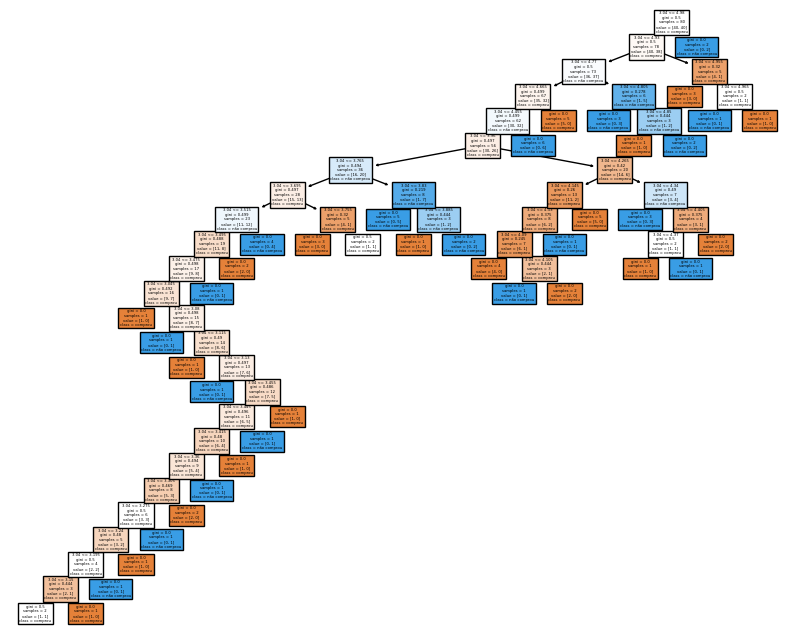

In [183]:
fig = plt.figure(figsize=(10,8))
tree.plot_tree(modelo,feature_names= rating.tolist(), class_names = y.tolist(), filled= True)

In [184]:
#unificando a tabela
products = df['product_name'].unique()


--------------------------- Árvore de Decisão do Produto Televisão ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.5
F1 Score: 0.5
Precision Score: 1.0
Recall Score: 0.3333333333333333
Confusion Matrix: [[1 2]
 [0 1]]

Visualização da Árvore:

--------------------------- Árvore de Decisão do Produto Celular ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.6
F1 Score: 0.6666666666666666
Precision Score: 0.5
Recall Score: 1.0
Confusion Matrix: [[2 0]
 [2 1]]

Visualização da Árvore:

--------------------------- Árvore de Decisão do Produto Cafeteira ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.5
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix: [[0 1]
 [0 1]]

Visualização da Árvore:

--------------------------- Árvore de Decisão do Produto Videogame ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
Co

C:\Users\dsadm\AppData\Local\Temp\ipykernel_2564\1474494069.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['purchased'] = product_df['purchased'].replace([1, 0], ['comprou', 'não Comprou'])
C:\Users\dsadm\AppData\Local\Temp\ipykernel_2564\1474494069.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['purchased'] = product_df['purchased'].replace([1, 0], ['comprou', 'não Comprou'])
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classifi

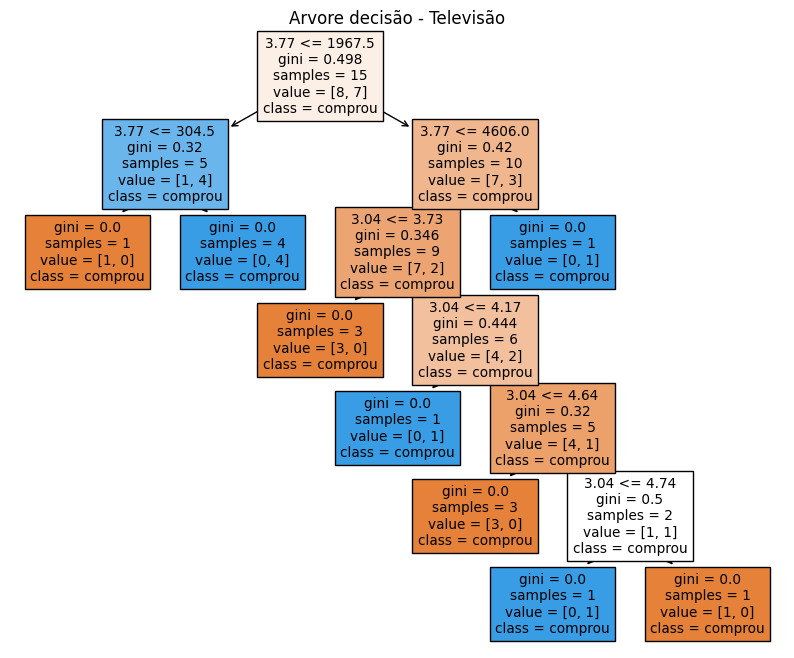

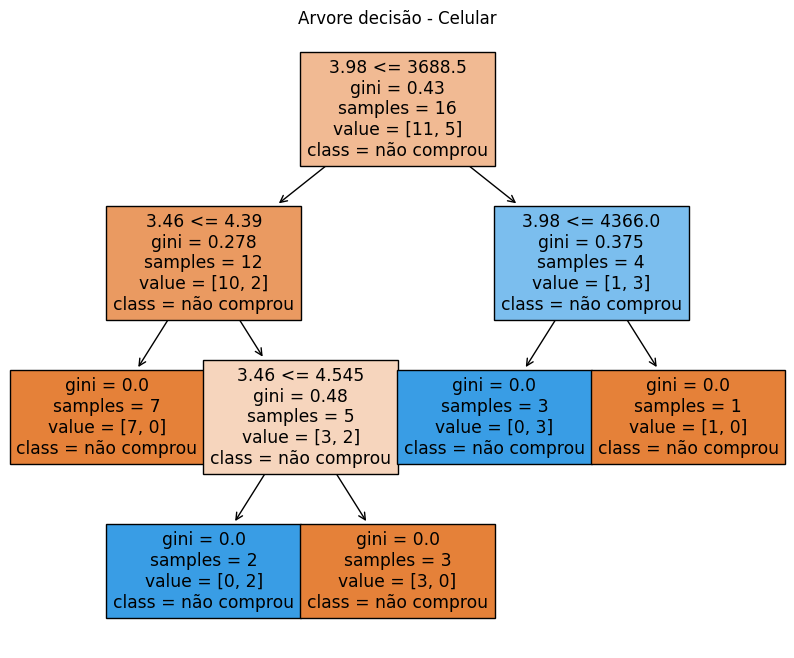

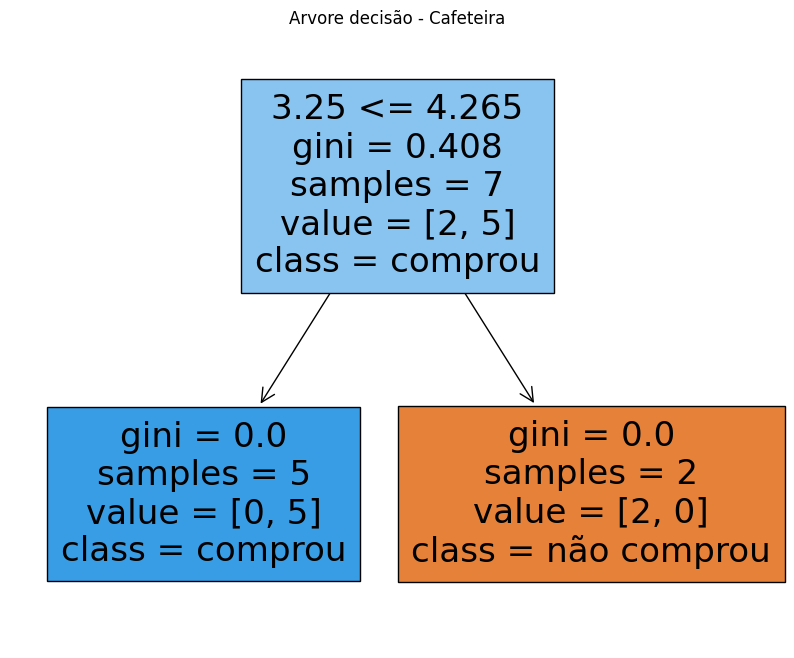

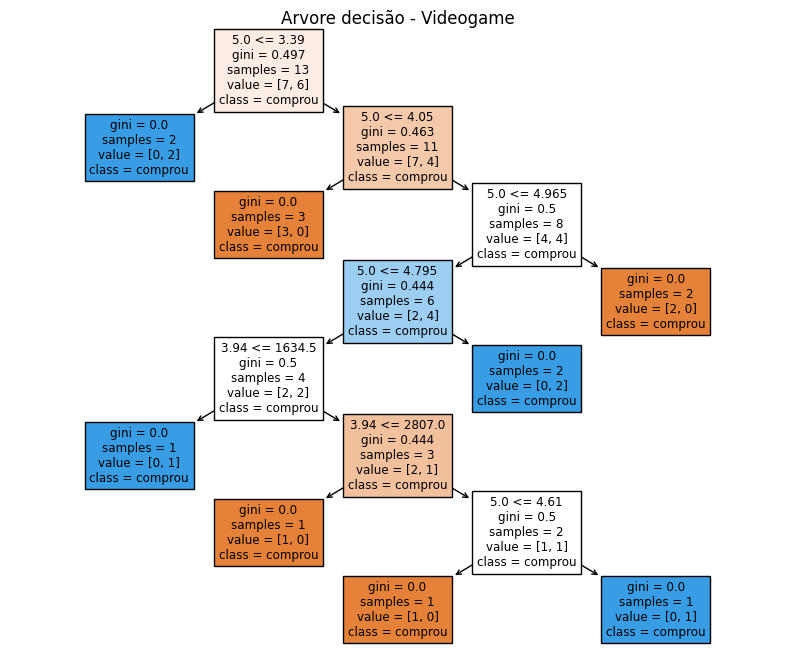

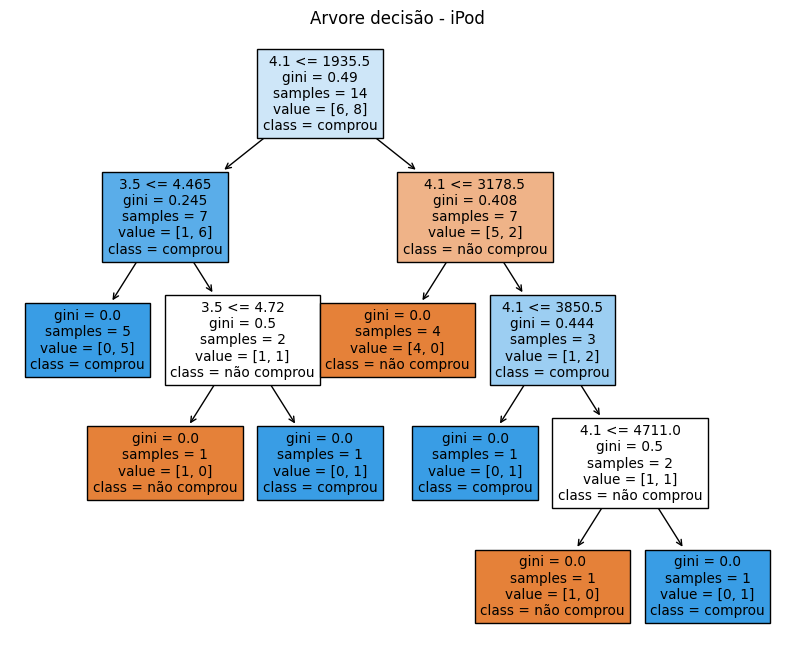

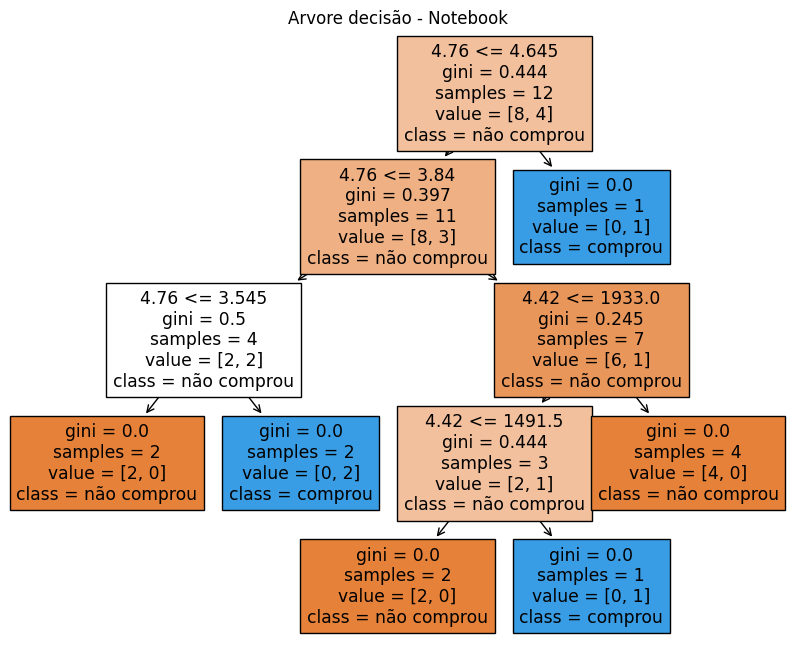

In [185]:
###5###
#Criando arvores individuais
for product in products:

    print(f'\n--------------------------- Árvore de Decisão do Produto {product} ---------------------------------\n')
    
    product_df = df.loc[df['product_name'] == product]

    X = product_df.drop(['purchased', 'product_name'], axis=1)
    y = product_df['purchased']

    rating_treino, rating_teste, purchased_treino, purchased_teste = train_test_split(X, y, test_size=0.2, random_state=42)

    dtc = DecisionTreeClassifier()
    model = dtc.fit(rating_treino, purchased_treino)
    previsoes = dtc.predict(rating_teste)

###7###

    print('Avaliação do Modelo: \n')
    print(f'Accuracy Score: {accuracy_score(purchased_teste, previsoes)}')
    print(f'F1 Score: {f1_score(purchased_teste, previsoes, pos_label="comprou")}')
    print(f'Precision Score: {precision_score(purchased_teste, previsoes, pos_label="comprou")}')
    print(f'Recall Score: {recall_score(purchased_teste, previsoes, pos_label="comprou")}')
    print(f'Confusion Matrix: {confusion_matrix(purchased_teste, previsoes)}')

    print('\nVisualização da Árvore:')

    product_df['purchased'] = product_df['purchased'].replace([1, 0], ['comprou', 'não Comprou'])

 ###8###   

    fig = plt.figure(figsize=(10, 8))
    
    tree.plot_tree(model, feature_names=product_df['rating'].tolist(), class_names=product_df['purchased'].tolist(), filled= True)
    plt.title(f'Arvore decisão - {product}')
